In [90]:
#import important libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [73]:
titanic=pd.read_csv(r"C:\Users\INPshy\Desktop\DATA Science\titanic_train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
#Passengerid column is nominal data Name colum is also dont have role in our model can delete
titanic.drop(['PassengerId','Name'],axis=1,inplace=True)

In [75]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [76]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [77]:
titanic.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

'Age' have missing values 177, 'cabin' missing values 687, 'embarked' missing values 2 

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [8]:
#fill NaN value ,even Cabin data missing value is more than 70% 687 out of891 can be drop but lets treat with mode
titanic['Age']=titanic['Age'].fillna(titanic['Age'].mean())
titanic['Cabin']=titanic['Cabin'].fillna(titanic['Cabin'].mode()[0])
titanic['Embarked']=titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

In [9]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,B96 B98,S


Sex is object can be done with label enocding,Ticket,Cabin ,Embarked column 

In [10]:
label=LabelEncoder()

In [11]:
titanic['Embarked']=label.fit_transform(titanic['Embarked'])

In [12]:
titanic['Sex']=label.fit_transform(titanic['Sex'])

In [13]:
titanic['Cabin']=label.fit_transform(titanic['Cabin'])

In [14]:
titanic['Ticket']=label.fit_transform(titanic['Ticket'])

In [15]:
titanic.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,523,7.2500,47,2
1,1,1,0,38.000000,1,0,596,71.2833,81,0
2,1,3,0,26.000000,0,0,669,7.9250,47,2
3,1,1,0,35.000000,1,0,49,53.1000,55,2
4,0,3,1,35.000000,0,0,472,8.0500,47,2
5,0,3,1,29.699118,0,0,275,8.4583,47,1
6,0,1,1,54.000000,0,0,85,51.8625,129,2
7,0,3,1,2.000000,3,1,395,21.0750,47,2
8,1,3,0,27.000000,0,2,344,11.1333,47,2
9,1,2,0,14.000000,1,0,132,30.0708,47,0


In [16]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    int32  
 7   Fare      891 non-null    float64
 8   Cabin     891 non-null    int32  
 9   Embarked  891 non-null    int32  
dtypes: float64(2), int32(4), int64(4)
memory usage: 55.8 KB


In [17]:
#see how many people survive based on gender Female=0, Male=1 by label encode
titanic['Survived'].value_counts()     

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

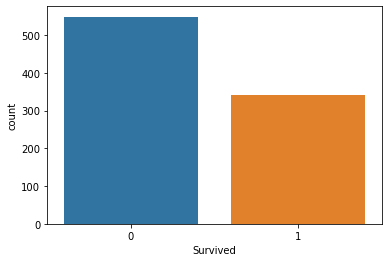

In [18]:
sns.countplot('Survived',data=titanic)

label is quite balance ,seems ok to proceed further

So total survived people is 342 and demise count is 549

In [19]:
titanic.groupby('Sex')['Survived'].value_counts()

Sex  Survived
0    1           233
     0            81
1    0           468
     1           109
Name: Survived, dtype: int64

ok lets plot the same

<AxesSubplot:xlabel='Sex', ylabel='count'>

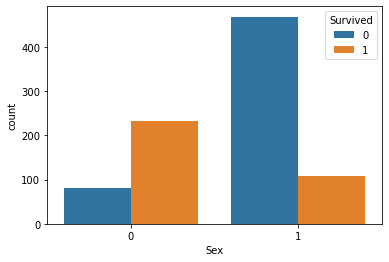

In [20]:
sns.countplot('Sex',hue='Survived',data=titanic)

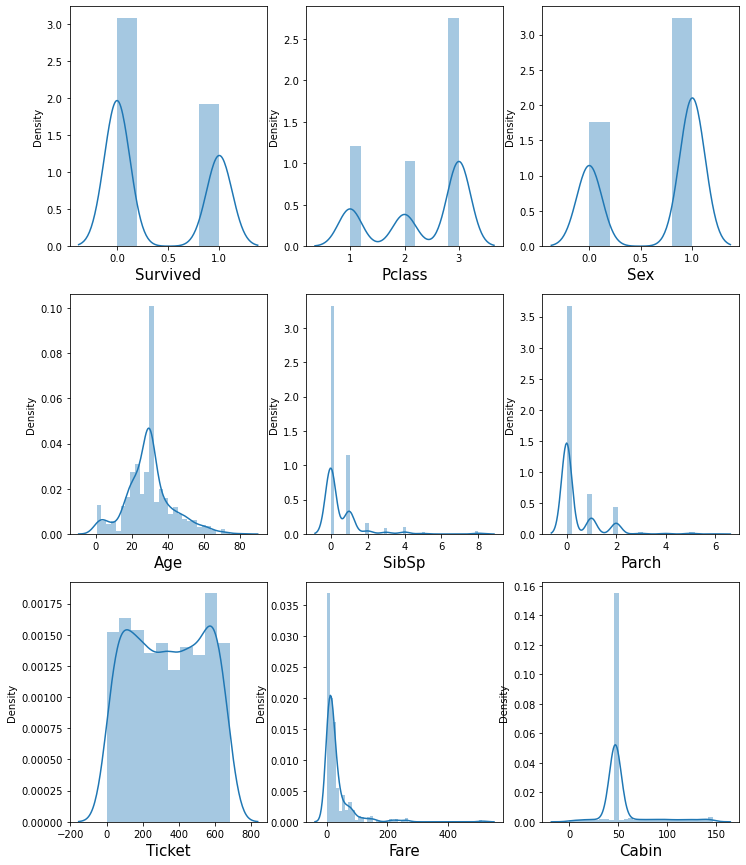

In [21]:
#visualize data distribution and check skewness
plt.figure(figsize=(12,15))
plotnumber=1
for column in titanic:
    if plotnumber<=9:
        ax=plt.subplot(3,3 ,plotnumber)
        sns.distplot(titanic[column])
        plt.xlabel(column,fontsize=15)
        plotnumber+=1
    
plt.show()

'Age', 'Fare' column are continous variable so only these two among all need to remove outliers, Age seems ok , fare need to remove outliers so lets remove outliers from Fare column

In [22]:
q=titanic['Fare'].quantile(0.94)
clean_data=titanic[titanic['Fare']<q]

<AxesSubplot:xlabel='Fare', ylabel='Density'>

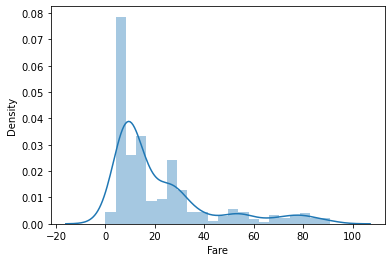

In [23]:
#now see data distribution in Fare column
sns.distplot(clean_data['Fare'])

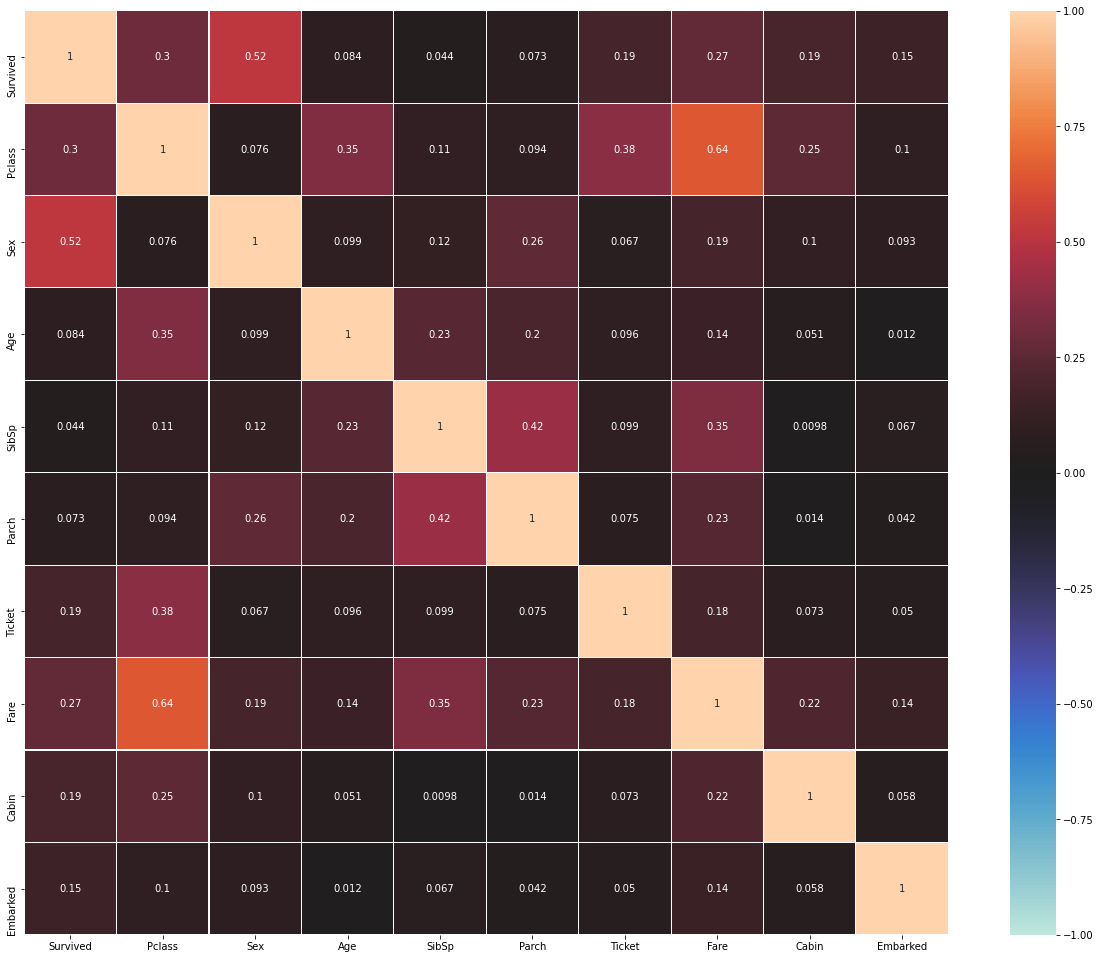

In [24]:
#lets see Plotting Heatmap(Correlation matrix) to check multicollinearity
df_corr=clean_data.corr().abs()
plt.figure(figsize=(22,17))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1)
plt.show()

In [25]:
corr_matrix=clean_data.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.269571
Cabin       0.190637
Parch       0.072669
SibSp      -0.044181
Age        -0.084281
Embarked   -0.151526
Ticket     -0.185710
Pclass     -0.299087
Sex        -0.523157
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Fare', ylabel='Cabin'>

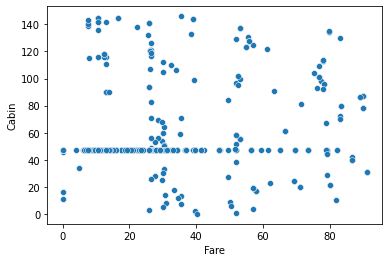

In [26]:
#seems no multicolloniarity but lets cross check bewteen Fare and Cabin
sns.scatterplot(x='Fare',y='Cabin',data=clean_data)

<AxesSubplot:xlabel='Fare', ylabel='Parch'>

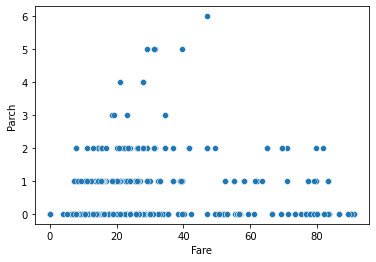

In [27]:
sns.scatterplot(x='Fare',y='Parch',data=clean_data)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

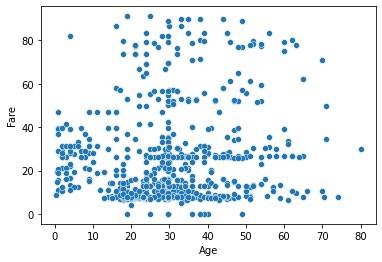

In [28]:
sns.scatterplot(x='Age',y='Fare',data=clean_data)

so its reconfrim that no multicolliniarity bewteen features ,as icross check by scatterplot

In [29]:
#now divide clean_data into features and Label for classification bulding model
X=clean_data.drop(columns='Survived',axis=1)
Y=clean_data['Survived']

In [30]:
#now scale the features data
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [31]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=.2,random_state=10)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [34]:
y_pred=lr.predict(x_test)

In [35]:
lr.score(x_train,y_train)  #score seems ok but we will improve after hyperparameter tuning

0.8098802395209581

In [36]:
confusion_matrix(y_pred,y_test)

array([[89, 19],
       [16, 44]], dtype=int64)

True Postive data is 89,and true negative is 44, false postive 19 and false negative 16

In [37]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       108
           1       0.70      0.73      0.72        60

    accuracy                           0.79       168
   macro avg       0.77      0.78      0.78       168
weighted avg       0.79      0.79      0.79       168



# Hyperparameter Tuning

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
#lets tune three hyperparameter right now,we are pasing the diffrent values for both parameters
grid_param={"C":np.logspace(-3,1,3,7), "penalty":["l1","l2"]}

In [40]:
grid_search=GridSearchCV(estimator=lr,param_grid=grid_param,cv=5)

In [41]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-01, 1.e+01]),
                         'penalty': ['l1', 'l2']})

In [42]:
grid_search.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [43]:
lr=LogisticRegression(penalty='l2',C=1)

In [44]:
lr.fit(x_train,y_train)

LogisticRegression(C=1)

In [45]:
lr.score(x_train,y_train)

0.8098802395209581

In [91]:
roc_auc_score(y_test,y_pred)

0.7746031746031746

# Cross Validation

In [46]:
from sklearn.model_selection import KFold ,cross_val_score

In [47]:
cross_val_score(lr,X_scaled,Y,cv=5).mean()

0.7919019104647846

so cross validation score is good, close lr score 

Descesion Tree  model

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [50]:
dt.score(x_train,y_train)

0.9985029940119761

Hyperparameter Tuning

In [51]:
parametrs={'criterion':['gini','entropy'],
   'max_depth':range(2,14,3),
    'min_samples_split':range(1,12,2),
    'min_samples_leaf':range(1,12,2)}

In [52]:
grid_search=GridSearchCV(estimator=dt,param_grid=parametrs,cv=5,n_jobs=-1)

In [53]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 14, 3),
                         'min_samples_leaf': range(1, 12, 2),
                         'min_samples_split': range(1, 12, 2)})

In [54]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 3,
 'min_samples_split': 3}

In [55]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_leaf=3,min_samples_split=3)

In [56]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=3,
                       min_samples_split=3)

In [57]:
dt.score(x_train,y_train)

0.9161676646706587

In [58]:
y_pred=dt.predict(x_test)

In [59]:
confusion_matrix(y_pred,y_test)

array([[90, 22],
       [15, 41]], dtype=int64)

In [60]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       112
           1       0.65      0.73      0.69        56

    accuracy                           0.78       168
   macro avg       0.75      0.77      0.76       168
weighted avg       0.79      0.78      0.78       168



In [92]:
roc_auc_score(y_test,y_pred)

0.7746031746031746

In [61]:
cross_val_score(dt,X_scaled,Y,cv=5).mean()

0.8098374679213002

model score is 91% and cross_val_score is 81%  model is slightly overfitted

RandomForest Classification model

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [64]:
rfc.score(x_train,y_train)

0.9985029940119761

Hyperparameter Tuning

In [68]:
parametrs={'criterion':['gini'],
    'max_depth':range(1,12,2),
    'min_samples_split':range(1,12,2),
    'min_samples_leaf':range(1,10,2),
    'min_weight_fraction_leaf':[0.01,0.020,.03,.1,.3]}

In [69]:
grid_search=GridSearchCV(rfc,param_grid=parametrs,cv=5)

In [71]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(1, 12, 2),
                         'min_weight_fraction_leaf': [0.01, 0.02, 0.03, 0.1,
                                                      0.3]})

In [78]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.01}

In [81]:
rfc=RandomForestClassifier(criterion='gini',max_depth=11,min_samples_leaf=3,min_samples_split=5,min_weight_fraction_leaf=0.01)

In [82]:
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=11, min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.01)

In [83]:
rfc.score(x_train,y_train)

0.9086826347305389

In [84]:
y_pred=rfc.predict(x_test)

In [85]:
confusion_matrix(y_test,y_pred)

array([[96,  9],
       [23, 40]], dtype=int64)

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       105
           1       0.82      0.63      0.71        63

    accuracy                           0.81       168
   macro avg       0.81      0.77      0.79       168
weighted avg       0.81      0.81      0.80       168



In [93]:
roc_auc_score(y_test,y_pred)

0.7746031746031746

In [88]:
cross_val_score(rfc,X_scaled,Y,cv=5).mean()

0.8277516395779868

cross validation score is 82 and Rnadomforest model score is 90 so model is slightly overfitted

Let's plot ROC AUC curve to chose best model

In [95]:
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import plot_roc_curve

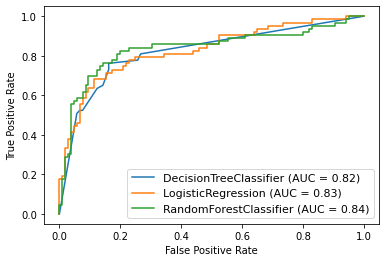

In [96]:
disp=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test, ax=disp.ax_) #ax_ is axis with confusion matrix  ,it is way that combine other confusion mt
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

so as per graph RandomForest has more coverd area i.e we will save RandomForest as best model

In [100]:
import pickle
file='pikle_dt_model'
with open(file ,'wb') as file:
    pickle.dump(rfc, file) #dt decesion tree model saving